In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy
import sklearn
# plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("notebook")
DATA_PATH = '../data/'

VAL_SPLITS = 4

In [48]:
df = pd.read_csv(os.path.join(DATA_PATH,'df_clean.csv'))
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Class,TimeScaled,TimeSin,TimeCos,AmountBC
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,0.000000,1.0,4.493777
1,1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,0.000000,1.0,1.268358
2,2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000006,0.000073,1.0,5.218064
3,3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000006,0.000073,1.0,4.340826
4,4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000012,0.000145,1.0,3.882043


In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

test_split = StratifiedShuffleSplit(n_splits=1,test_size=0.15,random_state=0)
idx_train, idx_test = next(test_split.split(df,df.Class))
df_train = df.iloc[idx_train]
df_test = df.iloc[idx_test]
df_train.to_csv(os.path.join(DATA_PATH,'df_train.csv'))
df_test.to_csv(os.path.join(DATA_PATH,'df_test.csv'))

15.000393917907507


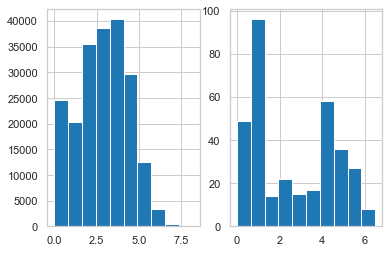

15.000393917907507


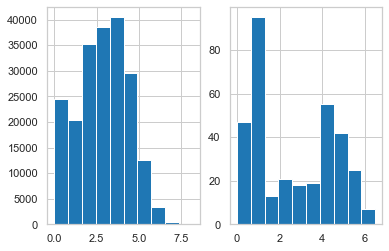

15.000393917907507


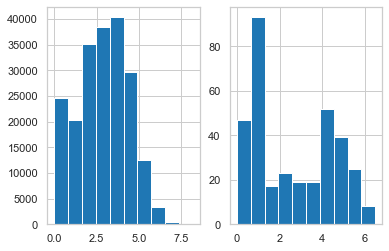

15.000393917907507


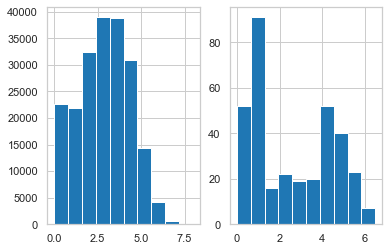

In [64]:
val_split = StratifiedShuffleSplit(n_splits=VAL_SPLITS,test_size=0.15,random_state=0)
for idx_t, idx_v in val_split.split(df_train,df_train.Class):
    print(100*len(idx_v)/(len(idx_t)+len(idx_v)))
    plt.subplot(1,2,1)
    df_train.iloc[idx_t].AmountBC.hist()
    plt.subplot(1,2,2)
    df_train.iloc[idx_t][df_train.iloc[idx_t].Class==1].AmountBC.hist()
    plt.show()